# Figures for the paper

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
hamiltonians_df = pd.DataFrame(pd.read_pickle('hamiltonians.pickle'))

In [3]:
hamiltonians_df

,molecule,basis,two_qubit_reduction,z2symmetry_reduction,freeze_core,mapping,operator,qubits,num_paulis,vqe_circuit,vqe_value,exact_circuit,exact_value,name
0,H2,sto3g,False,False,False,parity,"Representation: paulis, qubits: 4, size: 15",4,15,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.842665,((<qiskit.extensions.quantum_initializer.initi...,-1.842687,4q H2 parity
1,H2,sto3g,False,False,False,jordan_wigner,"Representation: paulis, qubits: 4, size: 15",4,15,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.842687,((<qiskit.extensions.quantum_initializer.initi...,-1.842687,4q H2 jordan_wigner
2,H2,631g,True,False,False,parity,"Representation: paulis, qubits: 6, size: 159",6,159,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.851596,((<qiskit.extensions.quantum_initializer.initi...,-1.857258,6q H2 parity
3,H2,631g,False,False,False,jordan_wigner,"Representation: paulis, qubits: 8, size: 185",8,185,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.832113,((<qiskit.extensions.quantum_initializer.initi...,-1.857258,8q H2 jordan_wigner
4,H2,631g,False,False,False,parity,"Representation: paulis, qubits: 8, size: 185",8,185,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.604568,((<qiskit.extensions.quantum_initializer.initi...,-1.857258,8q H2 parity
5,H2,sto3g,False,False,False,bravyi_kitaev,"Representation: paulis, qubits: 4, size: 15",4,15,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.842686,((<qiskit.extensions.quantum_initializer.initi...,-1.842687,4q H2 bravyi_kitaev
6,H2,631g,False,False,False,bravyi_kitaev,"Representation: paulis, qubits: 8, size: 185",8,185,((<qiskit.circuit.library.standard_gates.ry.RY...,-1.602965,((<qiskit.extensions.quantum_initializer.initi...,-1.857258,8q H2 bravyi_kitaev
7,LiH,sto3g,True,True,False,parity,"Representation: paulis, qubits: 8, size: 558",8,558,((<qiskit.circuit.library.standard_gates.ry.RY...,-8.873280,((<qiskit.extensions.quantum_initializer.initi...,-8.874532,8q LiH parity
8,LiH,sto3g,True,True,True,parity,"Representation: paulis, qubits: 6, size: 231",6,231,((<qiskit.circuit.library.standard_gates.ry.RY...,-0.950255,((<qiskit.extensions.quantum_initializer.initi...,-1.078084,6q LiH parity
9,LiH,sto3g,True,False,False,parity,"Representation: paulis, qubits: 10, size: 631",10,631,((<qiskit.circuit.library.standard_gates.ry.RY...,-8.854103,((<qiskit.extensions.quantum_initializer.initi...,-8.874532,10q LiH parity


In [4]:
grouped = hamiltonians_df[['molecule', 'mapping', 'basis', 'two_qubit_reduction', 'z2symmetry_reduction', 'freeze_core', 'qubits']].groupby(['molecule', 'mapping']).apply(lambda a: a[:])

In [5]:
latex_table = grouped.droplevel(level=2)[['qubits', 'basis', 'two_qubit_reduction', 'z2symmetry_reduction', 'freeze_core']].to_latex()

In [6]:
print(latex_table.replace('True', r'$\times$').replace('False', ''))

\begin{tabular}{llrllll}
\toprule
    &        &  qubits &  basis &  two\_qubit\_reduction &  z2symmetry\_reduction &  freeze\_core \\
molecule & mapping &         &        &                      &                       &              \\
\midrule
H2 & bravyi\_kitaev &       4 &  sto3g &                 &                  &         \\
    & bravyi\_kitaev &       8 &   631g &                 &                  &         \\
    & jordan\_wigner &       4 &  sto3g &                 &                  &         \\
    & jordan\_wigner &       8 &   631g &                 &                  &         \\
    & neven &       4 &  sto3g &                 &                  &         \\
    & neven &       8 &   631g &                 &                  &         \\
    & parity &       4 &  sto3g &                 &                  &         \\
    & parity &       6 &   631g &                 $\times$ &                  &         \\
    & parity &       8 &   631g &                 &        

### Legend names

In [7]:
method_names = {'Grouped_Pauli': 'Grouped Pauli',
                'SIC-POVM': 'SIC-POVM 1',
                'Google-POVM': 'SIC-POVM 2',
                'Grad-POVM': 'Grad. POVM 1',
                'Grad-Google-POVM': 'Grad. POVM 2'}

method_order=['Pauli', 'Grouped Pauli', 'SIC-POVM 1', 'SIC-POVM 2', 'Grad. POVM 1', 'Grad. POVM 2']

mapping_names = {"parity": "Parity", "bravyi_kitaev": "BK", "neven": "JKMN", "jordan_wigner": "JW"}

In [8]:
# Other things
mpl.rcParams['axes.labelsize'] = 12 

subplotlabelfont = {#'family': 'Helvetica',
        'fontweight': 'bold',
        'fontsize': 12
        }

def format_axes(axes, position=(-.1, 1.02), shift=0):
    for i, ax in enumerate(axes, start=97):
        ax.text(*position, chr(i + shift), fontdict=subplotlabelfont, weight='bold',
                transform=ax.transAxes)

## Fig. 2. Adaptive measurement

In [9]:
# Data loading
df = pd.read_feather('data/data_jw.feather')
#df2 = pd.read_feather('data/chemistry_neven.feather')
#df = pd.concat((df, df2), ignore_index=True)

# Show the molecules contained in the datset

df[['name', 'molecule', 'mapping', 'qubits', 'two_qubit_reduction', 'freeze_core',  'z2symmetry_reduction']].drop_duplicates(subset=['name']).sort_values(by=['molecule', 'mapping', 'qubits'])

KeyError: "['two_qubit_reduction', 'z2symmetry_reduction', 'freeze_core', 'molecule'] not in index"

In [10]:
# Data processing
names = ["8q H2 neven",
 "8q LiH sto3g bravyi_kitaev",
 "14q H2O neven"]

df['name'] = df['name'].replace({'8q LiH bravyi_kitaev': '8q LiH sto3g bravyi_kitaev'})

ddf = df[df['name'].isin(names)].query('estimated_error > 0')
ddf['method'] = ddf['method'].replace(method_names)

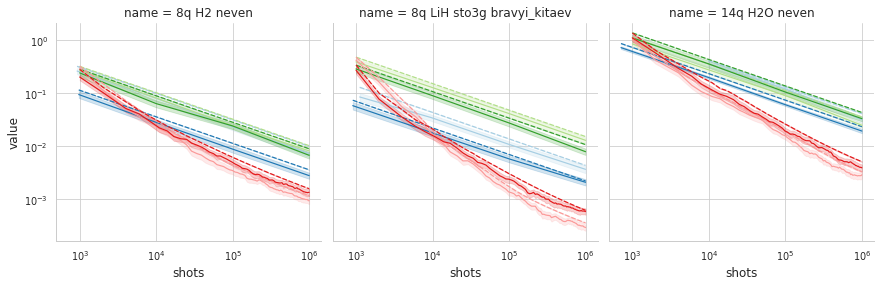

In [11]:
# Plot

sns.set(style='whitegrid')#, rc={'axes.labelsize': 12})
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

g = sns.relplot(
    data=pd.melt(ddf, 
                 id_vars=['shots', 'mapping', 'qubits', 'method', 'name'], 
                 value_vars=['error', 'estimated_error']), 
    x="shots", y="value",
    col="name",
    col_order=names,
    hue="method", 
    hue_order=method_order,
    style="variable", 
    kind="line",legend=None, height=4, 
    palette='Paired',
    ci=95).set(yscale ='log', xscale="log")#, ylim=(1e-4, 1)) 

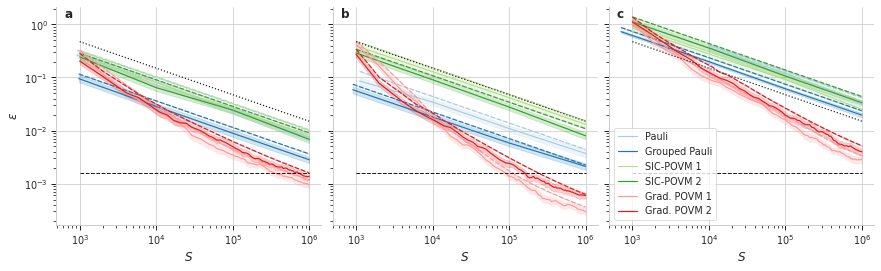

In [38]:
# Figure postprocessing

for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        plt.xlabel(r'$S$')
        r.set_title("")
        r.tick_params(which="both", bottom=True, left=True)

g.axes[0][0].set_ylabel(r'$\epsilon$')
g.axes[0][2].legend(g.axes[0][2].lines[:16:2], method_order, loc='lower left')

format_axes(g.axes[0], position=(.03, .95))
fig = plt.gcf()
abc_figsize = fig.get_size_inches()

plt.savefig('figures/fig2a-c.pdf', bbox_inches='tight')

### Fig. 3d. Parameters

In [12]:
from povm.povm_operator import POVMOperator, _PAULI_MATRICES
from qiskit.visualization import plot_bloch_vector

GOOGLE_PARAMS = [
        0.2838889,
        0.36284288,
        0.57602168,
        0.40456533,
        0.3999603,
        0.28235376,
        0.6941424,
        0.33333333,
    ]

In [23]:
# Data processing
pd.options.mode.chained_assignment = None # get rid of Pandas warning

def vecs_from_params(params):
    pis = POVMOperator._povm_from_unitary(POVMOperator._unitary_from_params(params))
    vecs = np.array([[np.real(np.trace(pis[i].dot(_PAULI_MATRICES[p]))) for p in ['X', 'Y', 'Z']] for i in range(4)])
    return vecs

# for name in tqdm(names):
#    for method in ['Grad-POVM', 'Grad-Google-POVM']:

name = names[0]
method = 'Grad-POVM'
method = 'Grad-Google-POVM'

print(name, method)
grad_df = df[df['method'].str.contains("Grad")]

ids = grad_df.query(f"name == '{name}' and method=='{method}'")['id'].drop_duplicates().sample(n=20)
data = grad_df.query(f'name == "{name}" and method=="{method}"')

ids

8q H2 neven Grad-Google-POVM


358678    KJtuUKBGSWQzn27k7srpLh
358820    bH4YKUAc9tCbeuTzBzmkfy
358611    WCJkmuVY5kWdTZCzcrEHEU
359047    ZgxRLCf8d2LzcV3jAgsDyD
358701    NjrmVjoy4HJvaDrJEZkdeJ
358576    VAzxuq8P294N7aGSvAGs4m
358728    mGrMFABkTmcHzXBxz8DRC3
358798    MKLVhuq2zfrLHUWepqWKZa
358714    gTpg9KpE6LX6hndQkNRcUz
358601    43ePUvBzRV6db4BqknLK6L
358700    afLPJPQJjveatunwseTosD
358860    3yDXbJSGza7QiPUzPGz2LZ
358948    o5qafBEAsEfmyZqEf7k4fr
358778    oKfpugATNYcgLTowZxTfVg
358583    ktvgsmpEvbH2C56ZqC9qDz
358606    RJzJZGoBqMkN6v5cGzReb5
358730    X92Emi8BsGF6c6VqbNsXEb
358808    axSYWNtQjMTrhWdqDfGQyN
358974    E9zF4Rk6HtrcD2iZvSstVc
358621    d8VVhwQsWkDHtrPsXVRJRk
Name: id, dtype: object

In [24]:
steps = data['step'].drop_duplicates().astype(int)

num_qubits = data['qubits'].max()
data.loc[:, 'step'] = data['step'].astype(int)
max_step = data["step"].max()
data = data.drop_duplicates(['id', 'step'])
data = data.query(f'step == {max_step}')

print("Max step:", max_step)
melted_data=pd.melt(data, 
                id_vars=['shots', 'method', 'name', 'id', 'step'], 
                value_vars=[f'povm_param_{i}' for i in range(data.qubits.iloc[0]*8)])
melted_data = melted_data.dropna()
melted_data['qubit'] = melted_data['variable'].apply(lambda str: int(str.split('_')[-1]) // 8)
melted_data['qubit_param'] = melted_data['variable'].apply(lambda str: int(str.split('_')[-1]) % 8)

Max step: 75


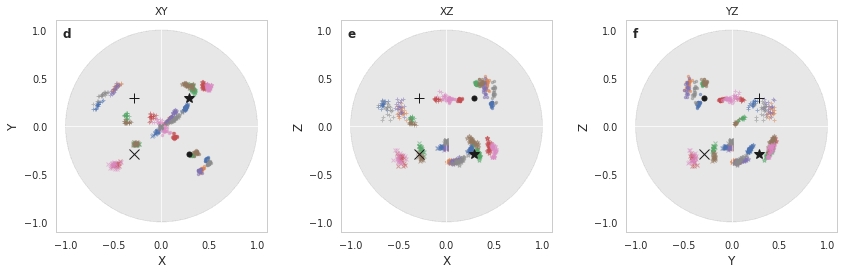

In [25]:
#fig, ax = plt.subplots(1, 3, figsize=[24, 8])

mpl.rcParams['axes.labelsize'] = 12 

fig, ax = plt.subplots(1, 3, figsize=[14, 4])

markers=['.', '*', '+', 'x']

projections = {'XY': (0, 1), 'XZ': (0, 2), 'YZ': (1, 2)}

for q in range(num_qubits):
    try:
        vecs_v = np.array([vecs_from_params(
                        np.array(
                            melted_data.query(f'qubit == {q} and id == "{aid}"').sort_values(by='qubit_param')['value'])) for aid in ids])
    except:
        print(q)
        #print(melted_data.query(f'qubit == {q} and id == "{id}"'))

    for ip, (projection, idx) in enumerate(projections.items()):        
        ax[ip].axhline(0, color='w', alpha =.2)
        ax[ip].axvline(0, color='w', alpha =.2)
        
        ax[ip].set_title(projection)
        ax[ip].add_patch(plt.Circle((0, 0), 1, color='k', alpha=.01))
        for i in range(4):
            ax[ip].plot(vecs_v[:, i, idx[0]], vecs_v[:, i, idx[1]], f'C{q}', marker=markers[i], linestyle = 'None',alpha=.5)
        ax[ip].set_aspect('equal', 'box')
        ax[ip].grid(False) 


init_params = GOOGLE_PARAMS if method == 'Grad-Google-POVM' else SIC_PARAMS
init_vecs_v = np.array([vecs_from_params(np.array(init_params)) for aid in ids])

for ip, (projection, idx) in enumerate(projections.items()):
    for i in range(4):
        ax[ip].plot(init_vecs_v[0,i,idx[0]], init_vecs_v[0,i,idx[1]], marker=markers[i], c='k', markersize=10, zorder=1000000)

    ax[ip].set_yticks([-1, -.5, 0, .5, 1])
    ax[ip].set_xlabel(projection[0])
    ax[ip].set_ylabel(projection[1])

plt.subplots_adjust(wspace=.35)
format_axes(fig.axes, position=(.03, .92), shift = 3) # add d, e, f
plt.savefig(f'figures/fig2d-f.pdf', bbox_inches='tight')

## Fig. 3. All results

In [39]:
# Data loading
df = pd.read_feather('data/chemistry_final.feather')
#df2 = pd.read_feather('data/chemistry_neven.feather')
#df = pd.concat((df, df2), ignore_index=True)

In [40]:
# Data processing
df['method'] = df['method'].replace(method_names)

In [41]:
ddf.groupby(['molecule', 'method', 'qubits']).count()

true  estimate  estimated_error  error  \
molecule method        qubits                                           
H2       Grad. POVM 1  8       7500      7500             7500   7500   
         Grad. POVM 2  8       7500      7500             7500   7500   
         Grouped Pauli 8        400       400              400    400   
         Pauli         8        400       400              400    400   
         SIC-POVM 1    8        400       400              400    400   
         SIC-POVM 2    8        400       400              400    400   
H2O      Grad. POVM 1  14      7500      7500             7500   7500   
         Grad. POVM 2  14      7500      7500             7500   7500   
         Grouped Pauli 14      2036      2036             2036   2036   
         Pauli         14       300       300              300    300   
         SIC-POVM 1    14       500       500              500    500   
         SIC-POVM 2    14       500       500              500    500   
LiH      Grad. POVM 1  8       7500      7500             7500   7500   
         Grad. POVM 2  8       7500      7500             7500   7500   
         Grouped Pauli 8        400       400              400    400   
         Pauli         8        400       400              400    400   
         SIC-POVM 1    8        400       400              400    400   
         SIC-POVM 2    8        400       400              400    400   

                               circuits  shots_per_circuit  shots  time_qc  \
molecule method        qubits                                                
H2       Grad. POVM 1  8           7500               7500   7500     7500   
         Grad. POVM 2  8           7500               7500   7500     7500   
         Grouped Pauli 8            400                400    400      400   
         Pauli         8            400                400    400      400   
         SIC-POVM 1    8            400                400    400      400   
         SIC-POVM 2    8            400                400    400      400   
H2O      Grad. POVM 1  14          7500               7500   7500     7500   
         Grad. POVM 2  14          7500               7500   7500     7500   
         Grouped Pauli 14          2036               2036   2036     2036   
         Pauli         14           300                300    300      300   
         SIC-POVM 1    14           500                500    500      500   
         SIC-POVM 2    14           500                500    500      500   
LiH      Grad. POVM 1  8           7500               7500   7500     7500   
         Grad. POVM 2  8           7500               7500   7500     7500   
         Grouped Pauli 8            400                400    400      400   
         Pauli         8            400                400    400      400   
         SIC-POVM 1    8            400                400    400      400   
         SIC-POVM 2    8            400                400    400      400   

                               time_post  name  ...  povm_param_103  \
molecule method        qubits                   ...                   
H2       Grad. POVM 1  8            7500  7500  ...               0   
         Grad. POVM 2  8            7500  7500  ...               0   
         Grouped Pauli 8             400   400  ...               0   
         Pauli         8             400   400  ...               0   
         SIC-POVM 1    8             400   400  ...               0   
         SIC-POVM 2    8             400   400  ...               0   
H2O      Grad. POVM 1  14           7500  7500  ...            7500   
         Grad. POVM 2  14           7500  7500  ...            7500   
         Grouped Pauli 14           2036  2036  ...               0   
         Pauli         14            300   300  ...               0   
         SIC-POVM 1    14            500   500  ...             500   
         SIC-POVM 2    14            500   500  ...             500   
LiH      Grad. 

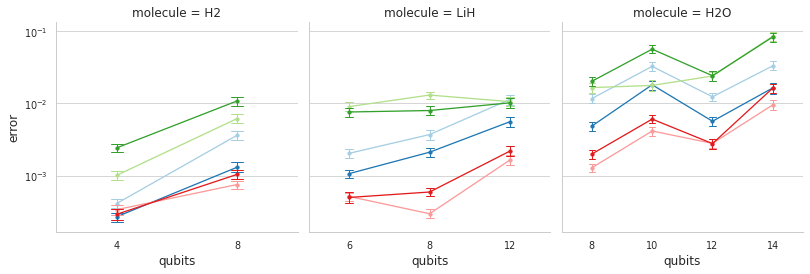

In [42]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

ddf = df.query('shots > 999000 and mapping == "bravyi_kitaev"')

g = sns.catplot(
    data=ddf,
    col='molecule',
    col_order=['H2', 'LiH', 'H2O'],
    x="qubits", y="error",
    hue="method",
    sharex=False,
    hue_order=method_order,
    palette='Paired',#dodge=True,
    height=3.7,
    scale=.6,
    capsize=.1,legend=None,
    errwidth=1,
    kind='point', join=True
    ).set(yscale='log')#, ylim=[8e-5, 1.5e-1])

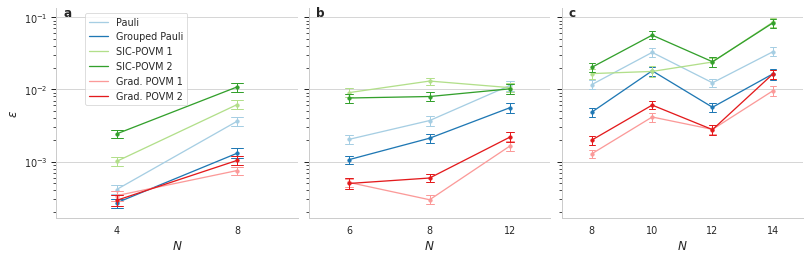

In [43]:
# Figure postprocessing

for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        #plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        #plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        plt.xlabel(r'$N$')
        r.set_title("")
        r.tick_params(which="both", left=True)

g.axes[0][0].set_ylabel(r'$\epsilon$')
#g.axes[0][2].legend(g.axes[0][2].lines[::13], method_order, loc='lower right')

g.axes[0][0].legend(g.axes[0][2].lines[::13], method_order, loc='upper left', bbox_to_anchor=(0.1, 1))
format_axes(g.axes[0], position=(.03, .96))
plt.savefig('figures/fig3.pdf', bbox_inches='tight')

### Full data figure for SM

<ipython-input-44-bb8741542983>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['mapping'] = ddf['mapping'].replace(mapping_names)
<ipython-input-44-bb8741542983>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['molecule'] = ddf['molecule'].replace({"H2O": r"$H_2O$", "H2": r"$H_2$"})


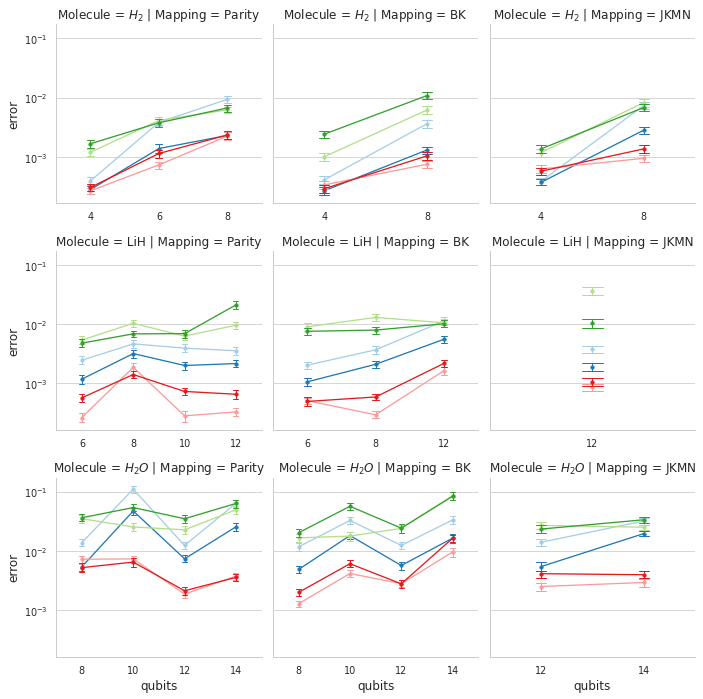

In [44]:
#sns.set_style("whitegrid")

sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})
ddf = df.query('shots > 999000')

ddf['mapping'] = ddf['mapping'].replace(mapping_names)
ddf['molecule'] = ddf['molecule'].replace({"H2O": r"$H_2O$", "H2": r"$H_2$"})

ddf = ddf.rename(columns={"method": "Method", 'molecule': "Molecule", 'mapping': 'Mapping'})
g = sns.catplot(
    data=ddf,
    row='Molecule',
    row_order=[r'$H_2$', 'LiH', r"$H_2O$"],
    col='Mapping',
    col_order=['Parity', 'BK', 'JKMN'],
    x="qubits", y="error",
    hue="Method",
    sharex=False,
    hue_order=method_order,
    palette='Paired',#dodge=True,
    height=3.2,
    aspect=1,
    scale=.6,
    capsize=.1,
    errwidth=1,legend=False,
    kind='point', join=True
    ).set(yscale='log')#, ylim=[8e-5, 1.5e-1])

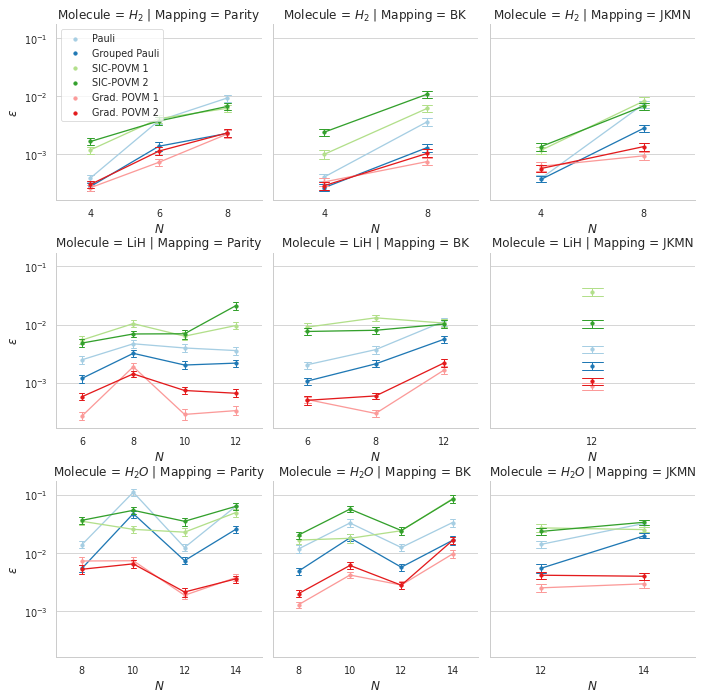

In [45]:
# Figure postprocessing
for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        #plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        #plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        r.set_xlabel(r'$N$')
        #r.tick_params(which="both", left=True)

for a in g.axes:
    a[0].set_ylabel(r'$\epsilon$')
g.axes[0][0].legend(loc='best', ncol=1)
#g.axes[0][2].legend(g.axes[0][2].lines[::13], method_order, loc='lower right')
plt.subplots_adjust(hspace=.3)
#g.axes[0][0].legend(g.axes[0][2].lines[::13], method_order, loc='upper left', bbox_to_anchor=(0.1, 1))
#format_axes(g.axes[0], position=(.03, .96))
plt.savefig('figures/fig6.pdf', bbox_inches='tight')

## Fig. 4. Scaling

In [23]:
# Data loading
df_h = pd.DataFrame(pd.read_pickle('hamiltonians_h_chain.pickle'))

# # Load partial data
# import glob
# dfs = [pd.read_json(f, lines=True) for f in glob.glob('raw_data/*.txt')]
# df = pd.concat(dfs)
# df = pd.merge(df, df_h[['mapping', 'name']], left_on='name', right_on='name', how='left', sort=False)

# df_old = pd.read_feather("data/data_neven.feather")
# df = pd.concat((df, df_old[~df_old['method'].str.contains('Grad')]))
df = pd.read_feather('data/data_h_chain.feather')
means_df = df.groupby(['qubits', 'mapping', 'method', 'shots']).mean()

In [24]:
# Data processing
target_accuracy = 5e-4
result = []
for method in means_df.index.get_level_values('method').drop_duplicates().tolist():
    for mapping in ['parity', 'bravyi_kitaev', 'neven']:
        for qubits in range(4, 16, 2):
            try:
                if 'Grad' in method:
                    extrapolated = False
                    aaa = means_df.loc[qubits, mapping, method].reset_index()
                    aaa = aaa.sort_values('error', ascending=True)
                    # Interpolate between the values that we have in order to find the required shots
                    # to reach the target accuracy.
                    # If that exceeds the range of values that we have, set it to nan
                    shots = np.interp(target_accuracy, aaa['error'], aaa['shots'], left=np.nan)
                    
                    # If we are out of our range of values, extrapolate from the last point we have,
                    # assuming a 1/sqrt(shots) dependence of the error
                    if np.isnan(shots):
                        s0 = aaa['shots'].iloc[0]
                        e0 = aaa['error'].iloc[0]
                        shots = (e0 / target_accuracy) ** 2 * s0
                        extrapolated = True 

                    result.append({'qubits': qubits, 'method': method, 'shots': shots, 'mapping':mapping, 'extrapolated': extrapolated})
                else:
                    s0 = means_df.loc[qubits, mapping, method].reset_index()['shots'].iloc[0]
                    e0 = means_df.loc[qubits, mapping, method]['error'].iloc[0]
                    shots = (e0 / target_accuracy) ** 2 * s0
                    result.append({'qubits': qubits, 'method': method, 'shots': shots, 'mapping':mapping, 'extrapolated': True})
            except:
                pass

plot_data = pd.DataFrame(result)

plot_data['log_shots']  = plot_data['shots'].apply(np.log10)
plot_data['log_qubits'] = plot_data['qubits'].apply(np.log10)

plot_data = plot_data.replace(method_names)
plot_data = plot_data.rename(columns={'method': 'Method'})

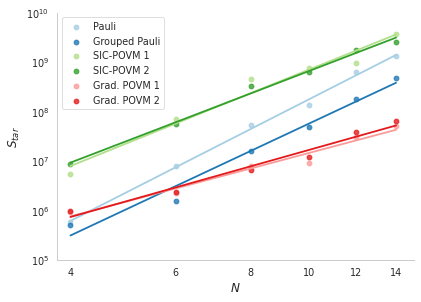

In [25]:
#Figure

sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

g = sns.lmplot(data=plot_data.query('mapping == "neven"'), 
               x='log_qubits', y='log_shots', 
               hue='Method', hue_order=method_order, ci=None, palette='Paired', legend_out=False,
               height=4, aspect=1.4)
ax = g.ax
g.set(xlabel=r"$N$")
g.set(ylabel=r"$S_{tar}$")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
plt.grid(False)
xticks = np.log10(np.arange(4, 16, 2))
ax.set_xticks(xticks)
yticks =np.arange(5, 11)
ax.set_yticks(yticks)
x_formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(x_formatter)

y_formatter = lambda x, pos: r'$10^{' + str(x) + r'}$'
ax.get_yaxis().set_major_formatter(y_formatter)
#lims = np.log10(np.array([0.005, 25.]))
ax.set_xlim(np.log10(np.array([3.8, 15])))
#ax.set_ylim(lims)
plt.savefig('figures/fig4.pdf', bbox_inches='tight')

In [26]:
# Table of exponents
from scipy.optimize import curve_fit
records = []
for method in plot_data['Method'].drop_duplicates().tolist():
    for mapping in ['parity', 'bravyi_kitaev', 'neven']:
        tdf = plot_data.query(f'mapping == "{mapping}" and Method == "{method}"')#.groupby('qubits').mean()
        popt, pcov = curve_fit(lambda t, a, b: a + t * b,  tdf['log_qubits'], tdf['log_shots'],  p0=(1, 2))
        perr = np.sqrt(np.diag(pcov))
        records.append({'mapping': mapping, 'Method': method, 'a': popt[0], 'a_err': perr[0], "b": popt[1], 'b_err': perr[1]})

scaling_df = pd.DataFrame(records)

scaling_df['Exponent'] = scaling_df['b'].round(1).astype(str) + "(" + scaling_df['b_err'].round(1).astype(str) +")"

print(scaling_df[['mapping', 'Method', 'Exponent']].pivot(index='Method', columns='mapping').round(1).to_latex())

\begin{tabular}{llll}
\toprule
{} & \multicolumn{3}{l}{Exponent} \\
mapping & bravyi\_kitaev &     neven &    parity \\
Method        &               &           &           \\
\midrule
Grad. POVM 1  &      4.6(0.5) &  3.2(0.3) &  4.3(0.6) \\
Grad. POVM 2  &      4.4(0.5) &  3.4(0.3) &  4.0(0.6) \\
Grouped Pauli &      6.4(0.5) &  5.7(0.4) &  5.5(0.4) \\
Pauli         &      6.8(0.5) &  6.2(0.2) &  6.0(0.4) \\
SIC-POVM 1    &      5.7(0.6) &  4.9(0.5) &  5.8(0.7) \\
SIC-POVM 2    &      4.4(0.4) &  4.7(0.2) &  5.4(0.5) \\
\bottomrule
\end{tabular}



## Fig. 5. Tomography with IC data

In [24]:
fid_df = pd.read_json('data/fidelities_tomo.json', orient='records')

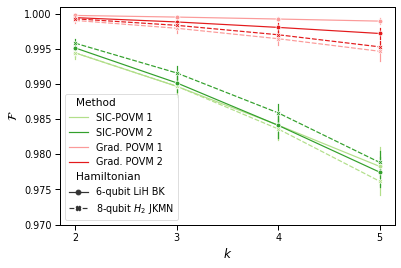

In [25]:
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})
color_palette = {'SIC-POVM 1': sns.color_palette("Paired")[2], 
                 'SIC-POVM 2': sns.color_palette("Paired")[3], 
                 'Grad. POVM 1': sns.color_palette("Paired")[4],
                 'Grad. POVM 2': sns.color_palette("Paired")[5]}

g = sns.lineplot(data=fid_df.reset_index(), x='k', y='avg_fidelity', hue='Method', 
                 palette=color_palette, hue_order=color_palette.keys(), ci='sd', err_style='bars',
                 style='Hamiltonian', markers=True)#.set(xscale='log', yscale='log')
plt.xlabel(r'$k$')
plt.ylabel(r'$\mathcal{F}$')

# Turns off grid on the left Axis.
plt.grid(False)
plt.gca().set_xticks([2, 3, 4, 5])

plt.gca().set_ylim([0.97, 1.001])
plt.savefig('figures/fig5.pdf', bbox_inches='tight')